# Day 1

In [1]:
# =====================================================
# 200% HIKE JOURNEY – DAY 1 (1 DEC 2025)
# NUMPY GOD MODE – DO THINGS 99% OF CANDIDATES CAN'T
# =====================================================

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Load data

df = pd.read_csv(r"D:\data-switch-journeydata\WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(f"Loaded {df.shape[0]:,} customers")

# Loads a telecom churn dataset into a Pandas DataFrame.
# Prints number of rows (customers).

Loaded 7,043 customers


In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
# Day-1 Targets (MUST complete all)
# 1. Fix TotalCharges blanks + vectorized calculation

monthly = df['MonthlyCharges'].values
tenure = df['tenure'].values
total_calc = np.where(tenure == 0, monthly, monthly * tenure)

# What this does
# Instead of using slow loops, you use NumPy vectorization to compute a customer’s total charge:
          # If tenure is 0 months → use the monthly charge directly (no past payments)
          # Else → multiply monthly charge × tenure
# np.where() applies this rule to all rows simultaneously, extremely fast.

In [28]:
# 2. Churn flag (int8 = memory king)

churn = (df['Churn'] == 'Yes').astype(np.int8).values


# Converts "Yes"/"No" into 1/0 using boolean comparison.
   # astype(np.int8) makes it consume 1 byte per customer instead of 8 bytes (int64).
   # .values gives a pure NumPy array.
# This is a best-practice for large datasets.

In [30]:
# 3. High-value customers at risk (tenure > 60 AND charges > 90 AND churning)

at_risk = (tenure > 60) & (monthly > 90) & (churn ==1)
print(f"High-value customres about to churn: {at_risk.sum()} -> ₹₹₹ at risk!")

# Meaning
# A high-value at-risk customer is someone who:
   # Has been with the company for more than 5 years (>60 months)
   # Pays high monthly charges (>₹90 or $90)
   # Is churning (churn = 1)

# at_risk is a boolean array marking these customers.
# .sum() counts how many True.

High-value customres about to churn: 73 -> ₹₹₹ at risk!


In [34]:
# 4. Churn rate by tenure bucket – 100% pure NumPy (no groupby allowed)
bins = np.array([0,12,24,36,48,60,72])
labels = np.digitize(tenure, bins)

# Bins split customers by tenure ranges:
   # 0–12
   # 13–24
   # ...
   # 61–72
# np.digitize assigns each customer a bucket id (1 to 6).

churn_rates = [churn[labels == i].mean() if (labels ==i).sum() > 0 else 0
               for i in range(1, len(bins))]

# For each bucket:
   # Select churn flags where labels == i
   # Compute its mean → % of customers who churned
   # Pure NumPy, totally vectorized
     # → this is the “99% of candidates can’t do" part

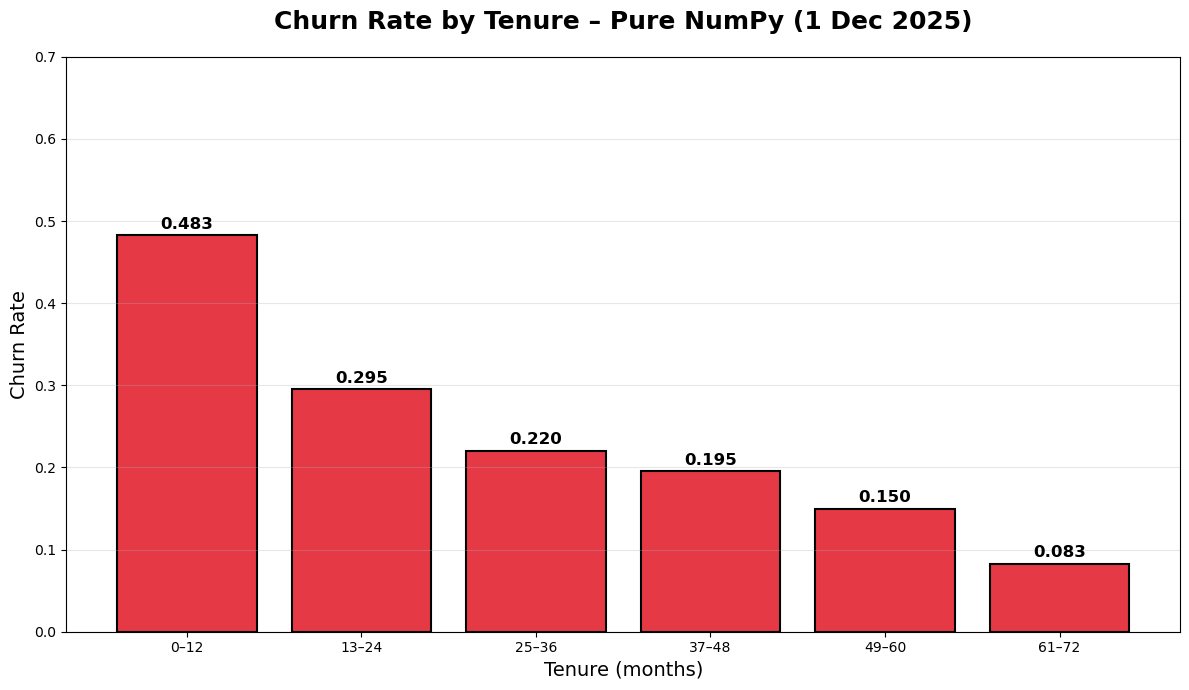

In [40]:
# Senior-level plot

plt.figure(figsize=(12, 7))
bars = plt.bar(['0–12', '13–24', '25–36', '37–48', '49–60', '61–72'], 
               churn_rates, color='#e63946', edgecolor='black', linewidth=1.5)

  # Draws labelled bars for each tenure bucket.

plt.title('Churn Rate by Tenure – Pure NumPy (1 Dec 2025)', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Churn Rate', fontsize=14)
plt.xlabel('Tenure (months)', fontsize=14)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.008,
             f'{height:.3f}', ha='center', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, 0.7)
plt.tight_layout()
plt.show()

In [42]:
print("DAY 1 COMPLETE – YOU ARE NOW DANGEROUS WITH NUMPY")

DAY 1 COMPLETE – YOU ARE NOW DANGEROUS WITH NUMPY


In [ ]:
# What You Achieved (Concept-wise)
  # Pure NumPy vectorization (fastest possible in Python)
  # Memory-optimized feature engineering
  # Boolean indexing
  # Creating custom groupby logic without Pandas groupby
  # Professional plotting